# CS464 Introduction to Machine Learning Homework 2 Question 4 - Logistic Regression


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

In [2]:
#accuracy and confusion matrix calculation
def performanceCalc(pred, y):
    #accuracy
    sampleSize = y.shape[0]
    true_cnt = 0
    for i in range(sampleSize):
        if(pred[i] == y[i]):
            true_cnt += 1
    accuracy = true_cnt / sampleSize

    tr_pos = 0;
    tr_neg = 0;
    fls_pos = 0;
    fls_neg = 0;
    for i in range(sampleSize):
        if(pred[i] == 1 and y[i] ==1):
            tr_pos += 1
        elif(pred[i] == 0 and y[i] == 0):
            tr_neg += 1
        elif(pred[i] == 1 and y[i] == 0):
            fls_pos += 1
        elif(pred[i] == 0 and y[i] == 1):
            fls_neg += 1

    
    #performance metrics
    precision = tr_pos / (tr_pos+fls_pos)
    recall = tr_pos / (tr_pos+fls_neg)
    npv = tr_neg / (tr_neg+fls_neg)
    fpr = fls_pos / (fls_pos+tr_neg)
    fdr = fls_pos / (tr_pos+fls_pos)
    f1 = (2*precision*recall)/(precision+recall)
    f2 = (5*precision*recall)/(4*precision+recall)
    return accuracy, tr_pos, tr_neg, fls_pos,fls_neg , precision, recall, npv, fpr, fdr, f1, f2

In [3]:
#find macro and micro averages
def macroMicroAvr(pred, y):
    accuracy_pos, tr_pos_pos, tr_neg_pos, fls_pos_pos,fls_neg_pos , precision_pos, recall_pos, npv_pos, fpr_pos, fdr_pos, f1_pos, f2_pos = performanceCalc(pred,y)
    pred_neg = (pred==0).astype(float)
    y_neg = (y==0).astype(float)
    accuracy_neg, tr_pos_neg, tr_neg_neg, fls_pos_neg, fls_neg_neg, precision_neg, recall_neg, npv_neg, fpr_neg, fdr_neg, f1_neg, f2_neg = performanceCalc(pred_neg,y_neg)
    
    print("Accuracy: " + str(accuracy_pos))
    print("----------")
    print("Confusion Matrix for Positive Class")
    conf_matrix = pd.DataFrame([[tr_pos_pos, fls_pos_pos],[fls_neg_pos, tr_neg_pos]])
    conf_matrix.columns = ["actual+", "actual-"]
    conf_matrix.rename(index={0:'classifier+',1:'classifier-'}, inplace=True)
    print(conf_matrix)
    
    #macro 
    mac_precision = (precision_pos+precision_neg)/2
    mac_recall = (recall_pos+recall_neg)/2
    mac_npv = (npv_pos+npv_neg)/2
    mac_fpr = (fpr_pos+fpr_neg)/2
    mac_fdr = (fdr_pos+fdr_neg)/2
    mac_f1 = (f1_pos+f1_neg)/2
    mac_f2 = (f2_pos+f2_neg)/2
    #micro
    mic_precision = (tr_pos_pos+tr_pos_neg)/(tr_pos_pos+tr_pos_neg+fls_pos_pos+fls_pos_neg)
    mic_recall = (tr_pos_pos+tr_pos_neg)/(tr_pos_pos+tr_pos_neg+fls_neg_pos+fls_neg_neg)
    mic_npv = (tr_neg_pos+tr_neg_neg)/(tr_neg_pos+tr_neg_neg+fls_neg_pos+fls_neg_neg)
    mic_fpr = (fls_pos_pos+fls_pos_neg)/(fls_pos_pos+fls_pos_neg+tr_neg_pos+tr_neg_neg)
    mic_fdr = (fls_pos_pos+fls_pos_neg)/(fls_pos_pos+fls_pos_neg+tr_pos_pos+tr_pos_neg)
    mic_f1 = (2*precision_pos*recall_pos+2*precision_neg*recall_neg)/(precision_pos+recall_pos+precision_neg+recall_neg)
    mic_f2 = (5*precision_pos*recall_pos+5*precision_neg*recall_neg)/(4*precision_pos+recall_pos+4*precision_neg+recall_neg)
    
    print("---------")
    print("Macro Statistics")
    print("Macro Precision: " + str(mac_precision))
    print("Macro Recall: " + str(mac_recall))
    print("Macro NPV: " + str(mac_npv))
    print("Macro FPR: " + str(mac_fpr))
    print("Macro FDR: " + str(mac_fdr))
    print("Macro F1: " + str(mac_f1))
    print("Macro F2: " + str(mac_f2))
    print("---------")
    print("Micro Statistics")
    print("Micro Precision: " + str(mic_precision))
    print("Micro Recall: " + str(mic_recall))
    print("Micro NPV: " + str(mic_npv))
    print("Micro FPR: " + str(mic_fpr))
    print("Micro FDR: " + str(mic_fdr))
    print("Micro F1: " + str(mic_f1))
    print("Micro F2: " + str(mic_f2))
    print("----------")

In [4]:
#find accuracies
def accuracyCalc(pred, y):
    sampleSize = y.shape[0]
    true_cnt = 0
    for i in range(sampleSize):
        if(pred[i] == y[i]):
            true_cnt += 1
    accuracy = true_cnt / sampleSize
    return accuracy

In [5]:
def chunks(l, n):
    for i in range(0, len(l), n):
        yield l[i:i+n]

In [6]:
#import data
x_train = pd.read_csv('question-2-train-features.csv', header=None, sep=',', names=["month","hr",
                                                                                    "weekday","weathersit",
                                                                                    "temp","atemp","hum",
                                                                                    "windspeed"])
y_train = pd.read_csv('question-2-train-labels.csv', header=None, sep=',', names=["bikes"])
x_test = pd.read_csv('question-2-test-features.csv', header=None, sep=',', names=["month","hr",
                                                                                    "weekday","weathersit",
                                                                                    "temp","atemp","hum",
                                                                                    "windspeed"])
y_test = pd.read_csv('question-2-test-labels.csv', header=None, names=["bikes"])

x_train_arr = np.asarray(x_train)
y_train_arr = np.asarray(y_train)
x_test_arr = np.asarray(x_test)
y_test_arr = np.asarray(y_test)
print(x_train.head(5))
print(y_train.head(5))
print(x_train.shape)
print(x_test.head(5))
print(y_test.head(5))
print(x_test.shape)

   month   hr  weekday  weathersit  temp   atemp   hum  windspeed
0    1.0  1.0      6.0         1.0  0.22  0.2727  0.80     0.0000
1    1.0  2.0      6.0         1.0  0.22  0.2727  0.80     0.0000
2    1.0  3.0      6.0         1.0  0.24  0.2879  0.75     0.0000
3    1.0  4.0      6.0         1.0  0.24  0.2879  0.75     0.0000
4    1.0  5.0      6.0         2.0  0.24  0.2576  0.75     0.0896
   bikes
0   40.0
1   32.0
2   13.0
3    1.0
4    1.0
(14000, 8)
   month    hr  weekday  weathersit  temp   atemp   hum  windspeed
0    8.0  14.0      6.0         1.0  0.80  0.7424  0.49     0.2985
1    8.0  15.0      6.0         1.0  0.80  0.7273  0.46     0.2836
2    8.0  16.0      6.0         1.0  0.80  0.7273  0.46     0.2985
3    8.0  17.0      6.0         3.0  0.74  0.6970  0.66     0.3582
4    8.0  18.0      6.0         2.0  0.70  0.6667  0.74     0.2985
   bikes
0  538.0
1  562.0
2  531.0
3  512.0
4  300.0
(3378, 8)


In [7]:
#discretizing the labels
#find mean of labels
all_label = pd.concat([y_test, y_train], axis=0, sort = True)
label_mean = np.mean(all_label.values)
print(label_mean)
#discretizing
for i in range(y_test.shape[0]):
    if(y_test_arr[i] >= label_mean):
        y_test_arr[i] = 1
    else:
        y_test_arr[i] = 0
y_test = pd.DataFrame(y_test_arr)
print(y_test.shape)
for i in range(y_train.shape[0]):
    if(y_train_arr[i] >= label_mean):
        y_train_arr[i] = 1
    else:
        y_train_arr[i] = 0
y_train = pd.DataFrame(y_train_arr)
print(y_train.shape)

189.47306939808954
(3378, 1)
(14000, 1)


# Question 4.1
## Batches for Cross Validation

In [8]:
#set the rng seed
np.random.seed(0)
#set cross validation parameters
k=10
fold_size = x_train_arr.shape[0]/k
#shuffle the dataset
idx = np.random.permutation(len(x_train_arr))
x_tr_arr_shuf,y_tr_arr_shuf = x_train_arr[idx], y_train_arr[idx]
#divide the data into folds
x_cnks = list(chunks(x_tr_arr_shuf, int(fold_size)))
y_cnks = list(chunks(y_tr_arr_shuf, int(fold_size)))

## Cross Validation

In [9]:
c_vals = np.array([10**-3, 10**-2,10**-1, 1.0,10**1, 10**2])
accs = np.ones((k,c_vals.shape[0]))
print(accs.shape)
for i in range(k):
    print("Fold: " + str(i))
    for c_ind in range(c_vals.shape[0]):
        print("C: " + str(c_vals[c_ind]))
        #set training feats
        cr_val_tr_x = list.copy(x_cnks)
        del cr_val_tr_x[i]
        cr_val_tr_x = np.asarray(cr_val_tr_x)
        cr_val_tr_x = cr_val_tr_x.reshape((12600,x_train_arr.shape[1]))
        #set training labels
        cr_val_tr_y = list.copy(y_cnks)
        del cr_val_tr_y[i]
        cr_val_tr_y = np.asarray(cr_val_tr_y)
        cr_val_tr_y = cr_val_tr_y.reshape((12600,y_train_arr.shape[1])) 
        #set validation feats
        cr_val_x = x_cnks[i]
        #set validation labels
        cr_val_y = y_cnks[i]
        #train
        clf = svm.LinearSVC(C = c_vals[c_ind], dual=False)
        clf.fit(cr_val_tr_x,np.ravel(cr_val_tr_y))
        #test on validation
        pred = clf.predict(cr_val_x)
        #report accuracy
        acc =  accuracyCalc(pred,cr_val_y)
        print("Acc = ", acc)
        accs[i,c_ind] = acc  

(10, 6)
Fold: 0
C: 0.001
Acc =  0.7442857142857143
C: 0.01
Acc =  0.7635714285714286
C: 0.1
Acc =  0.7664285714285715
C: 1.0
Acc =  0.7657142857142857
C: 10.0
Acc =  0.7671428571428571
C: 100.0
Acc =  0.7671428571428571
Fold: 1
C: 0.001
Acc =  0.7557142857142857
C: 0.01
Acc =  0.78
C: 0.1
Acc =  0.7842857142857143
C: 1.0
Acc =  0.7878571428571428
C: 10.0
Acc =  0.7871428571428571
C: 100.0
Acc =  0.7871428571428571
Fold: 2
C: 0.001
Acc =  0.7385714285714285
C: 0.01
Acc =  0.7585714285714286
C: 0.1
Acc =  0.7571428571428571
C: 1.0
Acc =  0.7564285714285715
C: 10.0
Acc =  0.7564285714285715
C: 100.0
Acc =  0.7571428571428571
Fold: 3
C: 0.001
Acc =  0.7371428571428571
C: 0.01
Acc =  0.7664285714285715
C: 0.1
Acc =  0.7664285714285715
C: 1.0
Acc =  0.7685714285714286
C: 10.0
Acc =  0.7678571428571429
C: 100.0
Acc =  0.7678571428571429
Fold: 4
C: 0.001
Acc =  0.7292857142857143
C: 0.01
Acc =  0.7614285714285715
C: 0.1
Acc =  0.7585714285714286
C: 1.0
Acc =  0.7642857142857142
C: 10.0
Acc =  

[0.7415     0.76607143 0.76714286 0.76821429 0.76764286 0.76771429]


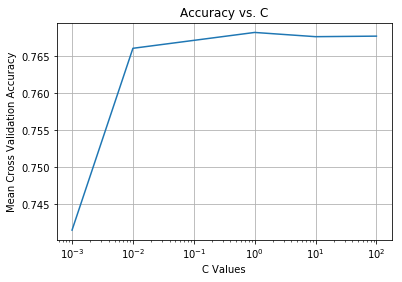

In [10]:
#mean calculation
mean_v = np.mean(accs,axis=0)
print(mean_v)
#plot the mean cross val accuracy
plt.semilogx(c_vals,mean_v)
plt.title("Accuracy vs. C")
plt.xlabel("C Values")
plt.ylabel("Mean Cross Validation Accuracy")
plt.grid()
plt.show()

In [11]:
#get the max c value
opt_c = c_vals[np.argmax(mean_v)]

In [12]:
#test on the test set with optimal C
clf = svm.LinearSVC(C =opt_c, dual=False)
clf.fit(x_train_arr,np.ravel(y_train_arr))
pred = clf.predict(x_test_arr)
macroMicroAvr(pred,y_test_arr)

Accuracy: 0.6983422143280047
----------
Confusion Matrix for Positive Class
             actual+  actual-
classifier+      847      101
classifier-      918     1512
---------
Macro Statistics
Macro Precision: 0.7578410689170183
Macro Recall: 0.7086352212634948
Macro NPV: 0.7578410689170183
Macro FPR: 0.2913647787365053
Macro FDR: 0.2421589310829817
Macro F1: 0.6861802340650758
Macro F2: 0.690002901286959
---------
Micro Statistics
Micro Precision: 0.6983422143280047
Micro Recall: 0.6983422143280047
Micro NPV: 0.6983422143280047
Micro FPR: 0.30165778567199525
Micro FDR: 0.30165778567199525
Micro F1: 0.6901035691426383
Micro F2: 0.6764843970881051
----------


# Question 4.2

In [13]:
gamma_vals = np.array([2**-4, 2**-3, 2**-2, 2**-1, 2**0, 2**1])
accs = np.ones((k,gamma_vals.shape[0]))
print(accs.shape)
for i in range(k):
    print("Fold: " + str(i))
    for gamma_ind in range(gamma_vals.shape[0]):
        print("Gamma: " + str(gamma_vals[gamma_ind]))
        #set training feats
        cr_val_tr_x = list.copy(x_cnks)
        del cr_val_tr_x[i]
        cr_val_tr_x = np.asarray(cr_val_tr_x)
        cr_val_tr_x = cr_val_tr_x.reshape((12600,x_train_arr.shape[1]))
        #set training labels
        cr_val_tr_y = list.copy(y_cnks)
        del cr_val_tr_y[i]
        cr_val_tr_y = np.asarray(cr_val_tr_y)
        cr_val_tr_y = cr_val_tr_y.reshape((12600,y_train_arr.shape[1])) 
        #set validation feats
        cr_val_x = x_cnks[i]
        #set validation labels
        cr_val_y = y_cnks[i]
        #train
        clf = svm.SVC(kernel='rbf',gamma = gamma_vals[gamma_ind],C=opt_c)
        clf.fit(cr_val_tr_x,np.ravel(cr_val_tr_y))
        #test on validation
        pred = clf.predict(cr_val_x)
        #report accuracy
        acc =  accuracyCalc(pred,cr_val_y)
        print("Acc = ", acc)
        accs[i,gamma_ind] = acc  

(10, 6)
Fold: 0
Gamma: 0.0625
Acc =  0.89
Gamma: 0.125
Acc =  0.895
Gamma: 0.25
Acc =  0.8935714285714286
Gamma: 0.5
Acc =  0.89
Gamma: 1.0
Acc =  0.8821428571428571
Gamma: 2.0
Acc =  0.8671428571428571
Fold: 1
Gamma: 0.0625
Acc =  0.8764285714285714
Gamma: 0.125
Acc =  0.8892857142857142
Gamma: 0.25
Acc =  0.8907142857142857
Gamma: 0.5
Acc =  0.8807142857142857
Gamma: 1.0
Acc =  0.8692857142857143
Gamma: 2.0
Acc =  0.855
Fold: 2
Gamma: 0.0625
Acc =  0.8585714285714285
Gamma: 0.125
Acc =  0.8621428571428571
Gamma: 0.25
Acc =  0.8664285714285714
Gamma: 0.5
Acc =  0.87
Gamma: 1.0
Acc =  0.8657142857142858
Gamma: 2.0
Acc =  0.8492857142857143
Fold: 3
Gamma: 0.0625
Acc =  0.8714285714285714
Gamma: 0.125
Acc =  0.8885714285714286
Gamma: 0.25
Acc =  0.88
Gamma: 0.5
Acc =  0.8828571428571429
Gamma: 1.0
Acc =  0.8721428571428571
Gamma: 2.0
Acc =  0.8642857142857143
Fold: 4
Gamma: 0.0625
Acc =  0.8792857142857143
Gamma: 0.125
Acc =  0.8857142857142857
Gamma: 0.25
Acc =  0.8921428571428571
Gamma

[0.8725     0.88142857 0.88214286 0.87885714 0.869      0.85457143]


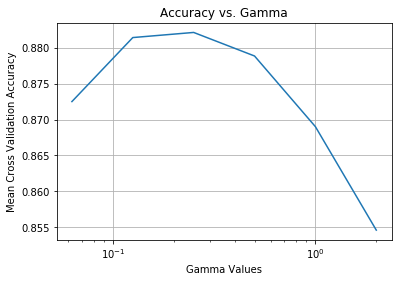

In [14]:
mean_v = np.mean(accs,axis=0)
print(mean_v)
plt.semilogx(gamma_vals,mean_v)
plt.title("Accuracy vs. Gamma")
plt.xlabel("Gamma Values")
plt.ylabel("Mean Cross Validation Accuracy")
plt.grid()
plt.show()

In [15]:
#get the max gamma value
opt_gamma = gamma_vals[np.argmax(mean_v)]

In [16]:
#classify the test data and report the statistics
clf = svm.SVC(kernel='rbf',gamma=opt_gamma, C=opt_c)
clf.fit(x_train_arr,np.ravel(y_train_arr))
pred = clf.predict(x_test_arr)
macroMicroAvr(pred,y_test_arr)

Accuracy: 0.8031379514505624
----------
Confusion Matrix for Positive Class
             actual+  actual-
classifier+     1180       80
classifier-      585     1533
---------
Macro Statistics
Macro Precision: 0.8301519852511354
Macro Recall: 0.809479108307326
Macro NPV: 0.8301519852511354
Macro FPR: 0.19052089169267408
Macro FDR: 0.1698480147488646
Macro F1: 0.8009644457538028
Macro F2: 0.8017668409478503
---------
Micro Statistics
Micro Precision: 0.8031379514505624
Micro Recall: 0.8031379514505624
Micro NPV: 0.8031379514505624
Micro FPR: 0.19686204854943753
Micro FDR: 0.19686204854943753
Micro F1: 0.8014029489651999
Micro F2: 0.795385894960567
----------
